In [2]:
# import the necessary packages
import import_ipynb
import cv2, os
from matplotlib import pyplot as plt
from tensorflow.keras.preprocessing import image
import numpy as np

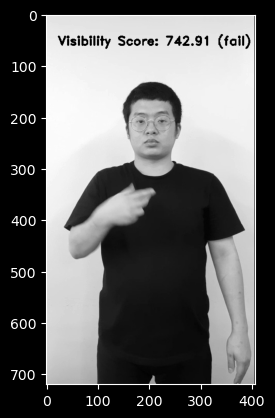

score mean:  742.908560717542
1 / 1 images deleted


In [19]:
class ImageProcess:
	def __init__(self):
		# self.dataset_dir = dateset_dir	# modify required
		self.blur_threshold = 39
		
	# compute the Laplacian of the image and then return the focus measure, which is simply the variance of the Laplacian
	def variance_of_laplacian(self, image) -> float:
		return cv2.Laplacian(image, cv2.CV_64F).var()

	def removeBlurImage(self, dataset_dir, blur_threshold, print_img=False):
		img_name_list = [i for i in os.walk(dataset_dir)][0][2]
		img_path_list = [os.path.join(dataset_dir, img) for img in img_name_list]
		# print(img_name_list)
		count = 0
		scoreList = []
		# loop over the input images
		for img in img_path_list:
			# load the image with grayscale, and compute the focus measure of the image using the Variance of Laplacian method
			image = cv2.imread(img, cv2.IMREAD_ANYDEPTH)
			fm = self.variance_of_laplacian(image)
			scoreList.append(fm)
			# if the focus measure is less than the supplied threshold,
			# then the image should be considered "Shaken"
			text = "Visibility Score"
			if fm < blur_threshold:
				cv2.putText(img = image, text = "{}: {:.2f} (success)".format(text, fm), org = (10, 60),
					fontFace = cv2.FONT_HERSHEY_DUPLEX, fontScale = 1.1, color = (255, 255, 255), thickness=3)
				# Show the image
				plt.imshow(image, 'gray')
				plt.show()
			else:
				cv2.putText(img = image, text = " {}: {:.2f} (fail)".format(text, fm), org = (10, 60),
					fontFace = cv2.FONT_HERSHEY_DUPLEX, fontScale = 0.8, color = (0, 0, 0), thickness=2)
				if print_img:
					plt.imshow(image, 'gray')
					plt.show()
				# delete the shaken images
				os.remove(img)
				count += 1
		print('score mean: ', np.mean(scoreList))
		print(count, "/", len(img_path_list), "images deleted")

if __name__ == '__main__':
	imgprocess = ImageProcess()
	imgprocess.removeBlurImage('/Users/hsyoon/Downloads/dd/', 39, True)